# Geomechanical Parameters from Well Logs

## Introduction

Dynamic geomechanical parameters were derived from well logs of 41 wells at relevant geothermal intervals. TNO has published the following documents describing the well logs and the selected files for the computations:

https://www.nlog.nl/sites/default/files/2021-12/data_selection_and_methods.pdf

The main selection criteria is the availability of compressional (DTCO, DTC, DT4C or DT) and shear (DTSM, DTS or DT4S) sonic logs for intervals that contain main geothermal targets in the Netherlands.

https://www.nlog.nl/sites/default/files/2021-12/appendix_a_list_of_wells_and_data_files_used.xlsx

Spreadsheet about wells which have sonic logs.

https://www.nlog.nl/sites/default/files/2021-12/appendix_b_summary_data_sheet.xlsx

Spreadsheet with average geomechanical parameter values per lithostratigraphic interval. 

## Loading Data

Let's take a look at the geomechanical parameters and make a crossplot.  

First, we will import both pandas and matplotlib python libraries. 

In [3]:
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

The geomechanical parameters are in Appendix B, which is in the folder called references. 

In [4]:
geomech_par = pd.read_excel('../references/appendix_b_summary_data_sheet.xlsx', sheet_name=1)

Data has been converted into a dataframe. Let's view the first 5 rows by callling upon the .head() function. We can see all the columns contained in this file. Note that there are NaN (_Not a Number_) data, which in the spreadsheet appear as empty cells. 

In [5]:
geomech_par.head()

,Well,Zone name / Formation,Lithostratigraphic Group,Subgroup / Formation,Lithology_type,Top (MD),TVCSS_Top,Bottom (MD),TVDSS Bottom (m),"% log data over interval for\nE, KB, Mu",Young’s Modulus E (GPa),Bulk Modulus KB (GPa),Shear Modulus Mu (GPa),"% log data over interval for\nPR, Vp, Vs, VpVs\n(only listed if different from column J)",Poison Ratio PR,Vp (ft/sec),Vs (ft/sec),Vp/Vs Ratio,File name logs
0,AMR-12,Laagpakket van Ten Boer,Boven-Rotliegend Groep,Silverpit Formatie,Kleisteen,3083.00,2734.68,3143.00,2789.37,0.530,30.253,19.651,12.233,NaN,0.238,12340.709,7194.953,1.717,AMR-12_AMSWEER_12_swa_01.lis
1,AMR-12,Formatie van Slochteren,Boven-Rotliegend Groep,Formatie van Slochteren,Zandsteen,3143.00,2789.37,3325.50,2955.36,0.993,28.625,15.004,12.162,NaN,0.179,11891.322,7418.644,1.605,AMR-12_AMSWEER_12_swa_01.lis
2,AMR-12,Caumer Subgroep,Limburg Groep,Caumer Subgroep,Kleisteen / Siltsteen,3325.50,2955.36,3348.00,2974.87,0.490,45.313,25.483,18.844,NaN,0.203,14301.405,8725.954,1.639,AMR-12_AMSWEER_12_swa_01.lis
3,BLD-01,Basale Dongen Tuffiet Laagpakket,Onder-Noordzee Groep,Formatie van Dongen,Klei / Silt,981.27,975.99,1004.27,999.00,NaN,NaN,NaN,NaN,0.889,0.220,17752.404,10442.157,1.720,bld01_EBN03093.s4
4,BLD-01,Landen Klei Laagpakket,Onder-Noordzee Groep,Formatie van Landen,Klei,1004.27,999.00,1030.27,1024.91,NaN,NaN,NaN,NaN,1.000,0.292,18332.176,9818.918,1.878,bld01_EBN03093.s4


## Inspecting Data

By calling the .info() function we know the number of rows and columns, the column names, and the data types of each of these columns. 

There 4 columns with depth information about each stratigraphic interval: _Top (MD)_ and _Bottom (MD)_ refer to the start and end depths of the interval as measured along the well path. MD = Measured Depth. Whereas _TVDSS_Top_ and _TVDSS_Bottom_ refer to the start and end depths of the interval measured vertically from the surface. TVDSS = True Vertical Depth SubSea.

Note: The key _TVCSS_Top_ appears to be a typo error and C corresponds to D.  


In [6]:
geomech_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 19 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Well                                                                                    446 non-null    object 
 1   Zone name / Formation                                                                   446 non-null    object 
 2   Lithostratigraphic Group                                                                442 non-null    object 
 3   Subgroup / Formation                                                                    437 non-null    object 
 4   Lithology_type                                                                          439 non-null    object 
 5   Top (MD)                                                               

## Checking Numerical Values
Calling upon the .describe() function, we get some statistical measurements of the numerical values only. This statistical summary is helpful to spot anomalous values.

In [7]:
geomech_par.describe()

,Top (MD),TVCSS_Top,Bottom (MD),TVDSS Bottom (m),"% log data over interval for\nE, KB, Mu",Young’s Modulus E (GPa),Bulk Modulus KB (GPa),Shear Modulus Mu (GPa),"% log data over interval for\nPR, Vp, Vs, VpVs\n(only listed if different from column J)",Poison Ratio PR,Vp (ft/sec),Vs (ft/sec),Vp/Vs Ratio
count,446.000000,438.000000,446.000000,439.000000,365.000000,366.000000,366.000000,366.000000,135.000000,446.000000,446.000000,446.000000,445.000000
mean,2692.453184,2301.363128,2774.994170,2373.928155,0.925863,42.946451,41.175598,17.816175,0.926837,0.262504,14225.214603,7983.050092,1.806942
std,973.279931,757.524985,957.060251,739.353757,0.174195,17.376519,217.254271,8.592205,0.168950,0.055671,2697.607264,1741.006234,0.187921
min,0.000000,-12.610000,270.000000,259.050000,0.005000,8.166000,3.924000,2.935000,0.201000,0.080000,6699.830000,3553.855000,1.484000
25%,1943.375000,1804.375000,2037.450000,1864.805000,0.969000,31.325250,21.491250,12.392000,0.978500,0.232250,12509.018750,6907.696000,1.702000
50%,2721.285000,2211.465000,2771.950000,2282.540000,1.000000,41.482500,28.701000,16.617500,1.000000,0.267000,14344.209000,8092.685500,1.786000
75%,3293.375000,2913.570000,3396.750000,2951.105000,1.000000,54.012000,35.806000,22.102000,1.000000,0.293750,15996.473500,9210.104500,1.862000
max,5123.500000,5071.430000,5162.000000,5109.820000,1.000000,90.862000,4179.133000,67.519000,1.000000,0.438000,21129.326000,11706.814000,3.308000


## Crossploting Data

The following image corresponds to Figure 5 in ([Hunfeld et al., 2021](https://www.nlog.nl/sites/default/files/2021-12/data_selection_and_methods.pdf)). 
![Young's Modulus vs Depth graph|100x100](../references/EvsTVCSS_Top.jpg)

Let's reproduce this _Young’s Modulus E (GPa) vs TVCSS_Top_ graph using the computed geomechanical properties.

The legend indicates _Lithology Type_, for which we have to collect the unique names to be able to plot them. 

In [8]:
lith_list = [(k) for k in geomech_par['Lithology_type'].unique()]

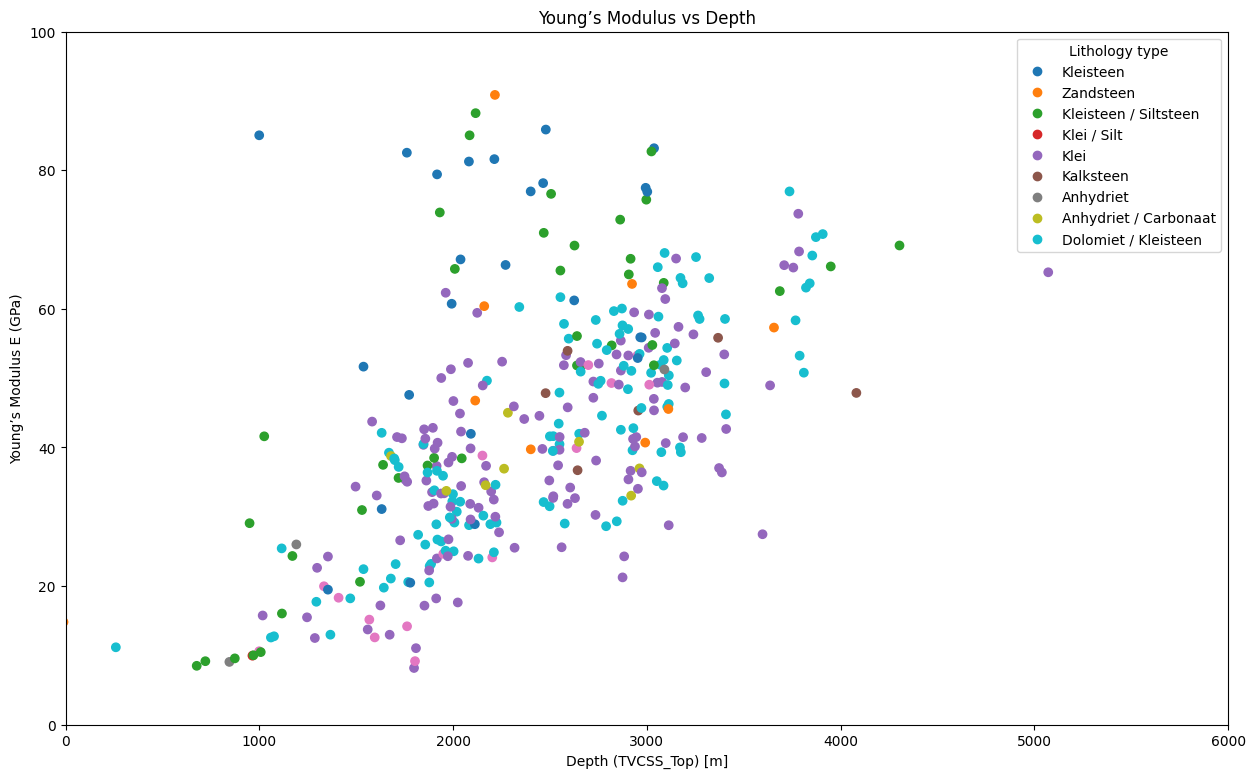

In [9]:
plt.figure(figsize=(15,9))
scatter = plt.scatter(geomech_par['TVCSS_Top'],
            geomech_par['Young’s Modulus E (GPa)'],
            c=geomech_par['Lithology_type'].astype('category').cat.codes,
            cmap="tab10")
plt.xlabel('Depth (TVCSS_Top) [m]')
plt.ylabel('Young’s Modulus E (GPa)')
plt.title('Young’s Modulus vs Depth')
plt.ylim(0, 100)
plt.xlim(0, 6000)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=lith_list,
           
           title="Lithology type")
plt.show()

